<a href="https://colab.research.google.com/github/yogeshreec/DailyPages/blob/master/96%25CNN_FashionMnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#importing the keras libraries and packages
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Flatten,Dense,InputLayer,Dropout,BatchNormalization
from tensorflow.keras.datasets import fashion_mnist

In [3]:
(train_images,train_labels),(test_images,test_labels)=fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [4]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

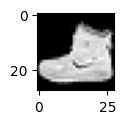

In [5]:
label = ["T-shirt/top","Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle boot"]
plt.figure(figsize=(1,1))
plt.imshow(train_images[0], cmap='gray')

In [6]:
model = Sequential()
model.add(InputLayer(input_shape=(28,28,1)))
model.add(Conv2D(filters=32,kernel_size=(3,3),activation='relu'))
model.add(Conv2D(filters=64,kernel_size=(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2),name='MP1'))
model.add(Conv2D(filters=128,kernel_size=(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2),name='MP2'))
model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dense(10,activation='softmax'))
model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 24, 24, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ MP1 (MaxPooling2D)              │ (None, 12, 12, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 10, 10, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ MP2 (MaxPooling2D)              │ (None, 5, 5, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 3200)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       409,728 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 503,690 (1.92 MB)

 Trainable params: 503,690 (1.92 MB)

 Non-trainable params: 0 (0.00 B)

In [7]:
train_images.shape

(60000, 28, 28)

In [8]:
train_images=train_images/255.
#normalize the data
cnn_x_train = train_images.reshape(60000,28,28,1)
#reshaping because our model is expecting input in the shape of 28*28*1
test_images=test_images/255.
#normalize the data
cnn_x_test = test_images.reshape(10000,28,28,1)


In [9]:
from tensorflow.keras.callbacks import EarlyStopping,ReduceLROnPlateau

In [10]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy')
model.fit(cnn_x_train,train_labels,epochs=10,batch_size=64, validation_split=0.2)

Epoch 1/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - loss: 0.6602 - val_loss: 0.3396
Epoch 2/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - loss: 0.3006 - val_loss: 0.2653
Epoch 3/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - loss: 0.2382 - val_loss: 0.2367
Epoch 4/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 0.2003 - val_loss: 0.2299
Epoch 5/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - loss: 0.1709 - val_loss: 0.2306
Epoch 6/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - loss: 0.1477 - val_loss: 0.2342
Epoch 7/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - loss: 0.1189 - val_loss: 0.2404
Epoch 8/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - loss: 0.0945 - val_loss: 0.2481
Epoch 9/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 0.0758 - val_loss: 0.2699
Epoch 10/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 0.0625 - val_loss: 0.2999


In [11]:
yhat = model.predict(cnn_x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


In [12]:
yhat.shape

(10000, 10)

In [13]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
print(classification_report(test_labels,np.argmax(yhat,axis=1),target_names=label))

              precision    recall  f1-score   support

 T-shirt/top       0.85      0.88      0.86      1000
     Trouser       1.00      0.98      0.99      1000
    Pullover       0.81      0.91      0.86      1000
       Dress       0.92      0.91      0.92      1000
        Coat       0.89      0.84      0.87      1000
      Sandal       0.99      0.98      0.98      1000
       Shirt       0.80      0.73      0.76      1000
     Sneaker       0.96      0.98      0.97      1000
         Bag       0.98      0.99      0.98      1000
  Ankle boot       0.97      0.96      0.97      1000

    accuracy                           0.92     10000
   macro avg       0.92      0.92      0.92     10000
weighted avg       0.92      0.92      0.92     10000



In [14]:
print(confusion_matrix(test_labels,np.argmax(yhat,axis=1)))

[[875   0  19  14   2   1  84   0   5   0]
 [  0 985   3   7   2   0   1   0   2   0]
 [ 18   0 911   3  28   0  37   0   3   0]
 [ 19   3  20 914  19   0  23   0   2   0]
 [  5   0  89  24 841   0  41   0   0   0]
 [  0   0   0   0   0 981   0  13   0   6]
 [107   1  74  27  51   0 735   0   5   0]
 [  0   0   0   0   0   4   0 976   0  20]
 [  2   0   2   6   1   1   2   0 986   0]
 [  0   0   1   0   0   6   0  31   0 962]]


In [15]:
#change the data - wherever shirt (label=6) make it T shirt (label=1)
y_train = train_labels.copy()
y_test =test_labels.copy()
y_train[y_train==6]=0#change the data - wherever shirt (label=6)and pullover(label=2)and coat(label=3) make it T shirt (label=1)
y_train = train_labels.copy()
y_test =test_labels.copy()
y_train[y_train==6]=0
y_test[y_test==6]=0
y_train[y_train==2]=0
y_test[y_test==2]=0
y_train[y_train==3]=0
y_test[y_test==3]=0
y_test[y_test==6]=0

In [16]:
model.fit(cnn_x_train,y_train,epochs=10,batch_size=64, validation_split=0.2)

Epoch 1/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - loss: 0.1551 - val_loss: 0.1369
Epoch 2/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - loss: 0.0269 - val_loss: 0.1492
Epoch 3/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - loss: 0.0250 - val_loss: 0.1465
Epoch 4/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - loss: 0.0208 - val_loss: 0.1612
Epoch 5/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - loss: 0.0152 - val_loss: 0.1545
Epoch 6/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 0.0175 - val_loss: 0.1978
Epoch 7/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - loss: 0.0143 - val_loss: 0.1782
Epoch 8/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - loss: 0.0135 - val_loss: 0.1925
Epoch 9/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 0.0140 - val_loss: 0.1976
Epoch 10/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - loss: 0.0084 - val_loss: 0.1906


In [ ]:
yhat=model.predict(cnn_x_test)
print(classification_report(y_test,np.argmax(yhat,axis=1),target_names=label1))

Epoch 1/12
1372/1372 ━━━━━━━━━━━━━━━━━━━━ 17s 9ms/step - accuracy: 0.9596 - loss: 0.1106 - val_accuracy: 0.9337 - val_loss: 0.2277 - learning_rate: 1.2500e-04
Epoch 2/12
1372/1372 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.9605 - loss: 0.1030 - val_accuracy: 0.9279 - val_loss: 0.2471 - learning_rate: 1.2500e-04
Epoch 3/12
1372/1372 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.9650 - loss: 0.0934 - val_accuracy: 0.9349 - val_loss: 0.2312 - learning_rate: 1.2500e-04
Epoch 4/12
1372/1372 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9659 - loss: 0.0917 - val_accuracy: 0.9355 - val_loss: 0.2338 - learning_rate: 1.2500e-04
Epoch 5/12
1372/1372 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9654 - loss: 0.0949 - val_accuracy: 0.9358 - val_loss: 0.2324 - learning_rate: 1.2500e-04
Epoch 6/12
1372/1372 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9645 - loss: 0.0933 - val_accuracy: 0.9333 - val_loss: 0.2418 - learning_rate: 1.2500e-04


In [17]:
print(confusion_matrix(y_test,np.argmax(yhat,axis=1)))


[[1019    4 1024  958  100    1  879    0   15    0]
 [   0  985    3    7    2    0    1    0    2    0]
 [   0    0    0    0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0    0    0]
 [   5    0   89   24  841    0   41    0    0    0]
 [   0    0    0    0    0  981    0   13    0    6]
 [   0    0    0    0    0    0    0    0    0    0]
 [   0    0    0    0    0    4    0  976    0   20]
 [   2    0    2    6    1    1    2    0  986    0]
 [   0    0    1    0    0    6    0   31    0  962]]


In [18]:
#change the data - wherever shirt (label=6)and pullover(label=2)and coat(label=3) make it T shirt (label=1)
y_train = train_labels.copy()
y_test =test_labels.copy()
y_train[y_train==6]=0
y_test[y_test==6]=0
y_train[y_train==2]=0
y_test[y_test==2]=0
y_train[y_train==3]=0
y_test[y_test==3]=0

In [19]:
model.fit(cnn_x_train,y_train,epochs=10,batch_size=32, validation_split=0.2)

Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - loss: 0.0389 - val_loss: 0.1868
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - loss: 0.0187 - val_loss: 0.2071
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - loss: 0.0165 - val_loss: 0.2458
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - loss: 0.0183 - val_loss: 0.2027
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - loss: 0.0129 - val_loss: 0.2347
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 12s 5ms/step - loss: 0.0129 - val_loss: 0.2199
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - loss: 0.0151 - val_loss: 0.2654
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - loss: 0.0126 - val_loss: 0.2375
Epoch 9/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - loss: 0.0150 - val_loss: 0.2365
Epoch 10/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - loss: 0.0109 - val_loss: 0.2344


In [20]:
label1 = ["T-shirt/top","Trouser","Dress","Sandal","Sneaker","Bag","Ankle boot"]

In [21]:
yhat=model.predict(cnn_x_test)
print(classification_report(y_test,np.argmax(yhat,axis=1),target_names=label1))

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
              precision    recall  f1-score   support

 T-shirt/top       0.96      0.97      0.96      4000
     Trouser       0.99      0.99      0.99      1000
       Dress       0.88      0.86      0.87      1000
      Sandal       0.99      0.98      0.98      1000
     Sneaker       0.96      0.96      0.96      1000
         Bag       0.99      0.97      0.98      1000
  Ankle boot       0.95      0.98      0.96      1000

    accuracy                           0.96     10000
   macro avg       0.96      0.96      0.96     10000
weighted avg       0.96      0.96      0.96     10000



In [22]:
print(confusion_matrix(y_test,np.argmax(yhat,axis=1)))


[[3869    9  111    0    1    9    1]
 [  11  988    0    0    0    1    0]
 [ 140    1  859    0    0    0    0]
 [   0    1    0  977   13    1    8]
 [   0    0    0    7  956    0   37]
 [  17    3    4    2    3  968    3]
 [   1    0    0    3   18    0  978]]
